In [3]:
from Hierarchy.PipelineFunctions.MainWorkers import FUNCOFMETHODS, times_when_method_better, NewRunExperiment, ReadLogs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
import numpy as np

In [2]:
now = NewRunExperiment(600000, 6, 1000, FUNCOFMETHODS)
now

100%|██████████| 1000/1000 [00:20<00:00, 48.66it/s]


'2023-04-11 15:21:21'

In [3]:
TimeLogsList, Ultradists, SamplesList, MaxList, SumList, NameOfMethodList = ReadLogs(now)

In [4]:
TimeMatrix = pd.DataFrame({'Method': NameOfMethodList, 'Time': TimeLogsList})

grouper = TimeMatrix.groupby('Method')
ResultsForTime = pd.concat([pd.Series(v['Time'].tolist(), name=k) for k, v in grouper], axis=1)

ResultsForTime.mean()

complete_linked            0.000832
group_average_linked       0.000817
median_linked              0.002781
min_max_linked             0.002687
single_linked              0.001052
weighted_average_linked    0.000807
dtype: float64

In [5]:
ResultsForTime.sum()

complete_linked            0.832061
group_average_linked       0.817494
median_linked              2.781341
min_max_linked             2.687153
single_linked              1.052100
weighted_average_linked    0.806671
dtype: float64

In [6]:
# ПРОВЕРКА НА МОНОТОННОСТЬ

flag = 0
for num, ultra in enumerate(Ultradists):
    if sorted(ultra) != ultra:
        print(f"Пример номер {NameOfMethodList[num]}: {num}")
        print(ultra)
        print()
        flag = 1
if flag != 1:
    print("the methods is monotonous")

the methods is monotonous


In [7]:
MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})

grouper = MaxMatrix.groupby('NameOfMethod')
ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)

ResultsForMax.head()

,complete_linked,group_average_linked,median_linked,min_max_linked,single_linked,weighted_average_linked
0,172.666929,90.915614,96.140934,86.333465,172.666929,99.387044
1,151.955904,93.951575,104.261273,75.977952,151.955904,93.236169
2,85.069025,48.507446,65.963100,42.534513,85.069025,53.883981
3,131.611656,87.703728,92.077302,65.805828,131.611656,76.796826
4,122.017292,73.083045,99.155464,61.008646,122.017292,61.099197


In [8]:
SumMatrix = pd.DataFrame({'MetricsByMethodsForSum': SumList, 'NameOfMethod': NameOfMethodList})

grouper = SumMatrix.groupby('NameOfMethod')
ResultsForSum = pd.concat([pd.Series(v['MetricsByMethodsForSum'].tolist(), name=k) for k, v in grouper], axis=1)

ResultsForSum.head()

,complete_linked,group_average_linked,median_linked,min_max_linked,single_linked,weighted_average_linked
0,111.082870,55.505861,55.446819,55.535381,100.691214,58.605515
1,70.557684,61.752986,60.378359,64.149469,105.072906,67.695604
2,39.673826,32.994807,28.494399,34.119824,49.992223,32.706457
3,70.359395,35.441852,34.858709,43.452168,42.247011,47.848567
4,51.113269,45.051263,39.484981,47.643379,61.319292,45.853545


<AxesSubplot: >

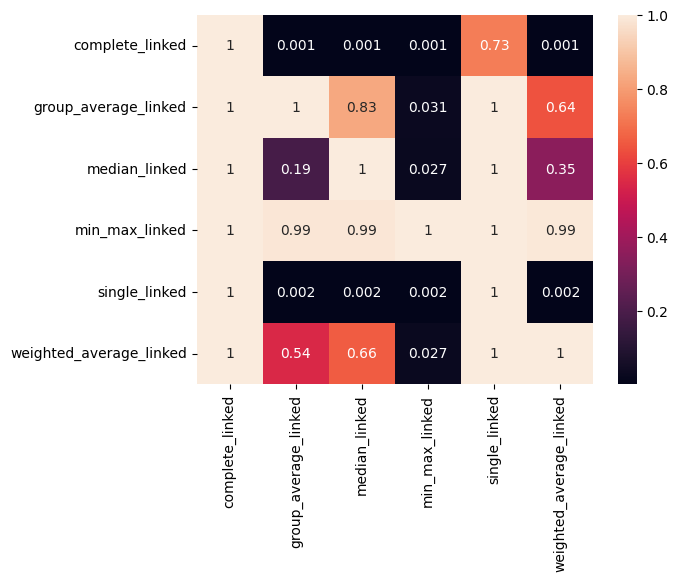

In [9]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

In [10]:
for col in ResultsForMax.columns:
    print(col)
    print(list(ResultsForMax.query(f"min_max_linked > {col}").index))
    print()

complete_linked
[]

group_average_linked
[154, 183, 316, 317, 427, 429, 447, 491, 706, 718, 762, 890]

median_linked
[5, 278, 316, 317, 405, 427, 429, 706, 718, 751, 762, 803, 969]

min_max_linked
[]

single_linked
[304]

weighted_average_linked
[17, 328, 491, 505, 568, 795, 948, 969]



<AxesSubplot: >

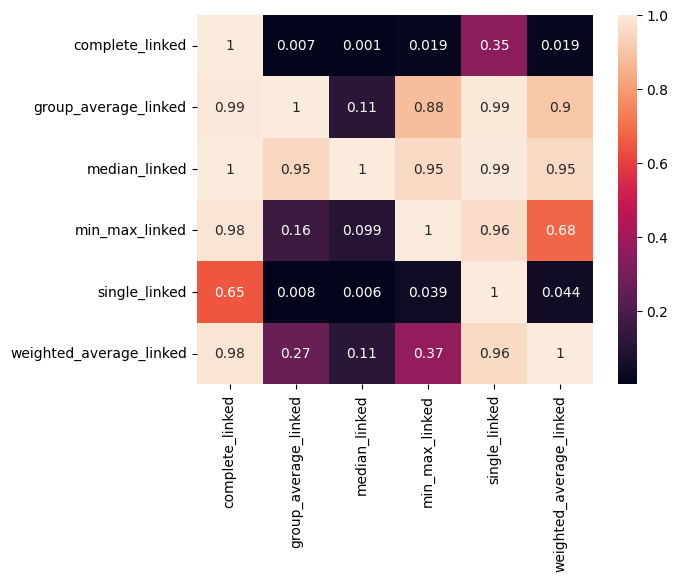

In [11]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)

In [16]:
test_data = SamplesList[154]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,246.1,319.1
1,314.5,276.9
2,274.8,343.8
3,246.4,249.0
4,276.9,274.9
5,167.1,82.4


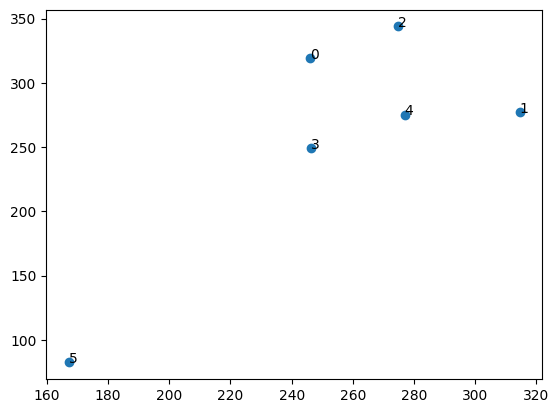

In [17]:
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.03, str(i))

In [18]:
from MinMaxHierarchy import MinMaxHierarchy

MinMaxHierarchy(test_data, logs_turn_on=True, metric='euclidean')

Distance matrix: 0 step
            0           1           2           3           4           5
0    0.000000   80.370393   37.865288   70.100642   53.872813  249.535348
1   80.370393    0.000000   77.792673   73.593614   37.653154  244.043049
2   37.865288   77.792673    0.000000   98.962619   68.931995  282.717615
3   70.100642   73.593614   98.962619    0.000000   40.013248  184.510298
4   53.872813   37.653154   68.931995   40.013248    0.000000  221.612928
5  249.535348  244.043049  282.717615  184.510298  221.612928    0.000000

Clusters:['0' '1' '2' '3' '4' '5']


('Clusters:', array(['(1, 4)', '0', '2', '3', '5'], dtype='<U30'))
Distance matrix: 1 step
            (1, 4)           0           2           3           5
(1, 4)    0.000000   67.121603   73.362334   56.803431  232.827989
0        67.121603    0.000000   37.865288   70.100642  249.535348
2        73.362334   37.865288    0.000000   98.962619  282.717615
3        56.803431   70.100642   98.962619    0.000000  184.5

(((((1, 4), 3), (0, 2)), 5),
 array([[  0.      ,  80.370393,  37.865288,  70.100642,  53.872813,
         249.535348],
        [ 80.370393,   0.      ,  77.792673,  73.593614,  37.653154,
         244.043049],
        [ 37.865288,  77.792673,   0.      ,  98.962619,  68.931995,
         282.717615],
        [ 70.100642,  73.593614,  98.962619,   0.      ,  40.013248,
         184.510298],
        [ 53.872813,  37.653154,  68.931995,  40.013248,   0.      ,
         221.612928],
        [249.535348, 244.043049, 282.717615, 184.510298, 221.612928,
           0.      ]]),
 [37.653154, 37.865288, 56.803431, 76.417716, 233.613957])

In [19]:
from HierarchyClusteringWithoutLogs import hierarchy
from Linkages import group_average_linked

hierarchy(test_data, metric='euclidean', method=group_average_linked, logs_turn_on=True)

Distance matrix: 0 step
            0           1           2           3           4           5
0    0.000000   80.370393   37.865288   70.100642   53.872813  249.535348
1   80.370393    0.000000   77.792673   73.593614   37.653154  244.043049
2   37.865288   77.792673    0.000000   98.962619   68.931995  282.717615
3   70.100642   73.593614   98.962619    0.000000   40.013248  184.510298
4   53.872813   37.653154   68.931995   40.013248    0.000000  221.612928
5  249.535348  244.043049  282.717615  184.510298  221.612928    0.000000

Clusters:['0' '1' '2' '3' '4' '5']


('Clusters:', array(['(1, 4)', '0', '2', '3', '5'], dtype='<U30'))
Distance matrix: 1 step
            0           1           2           3           4
0    0.000000   67.121603   73.362334   56.803431  232.827989
1   67.121603    0.000000   37.865288   70.100642  249.535348
2   73.362334   37.865288    0.000000   98.962619  282.717615
3   56.803431   70.100642   98.962619    0.000000  184.510298
4  232.827989  249.

(((((1, 4), 3), (0, 2)), 5),
 array([[  0.      ,  80.370393,  37.865288,  70.100642,  53.872813,
         249.535348],
        [ 80.370393,   0.      ,  77.792673,  73.593614,  37.653154,
         244.043049],
        [ 37.865288,  77.792673,   0.      ,  98.962619,  68.931995,
         282.717615],
        [ 70.100642,  73.593614,  98.962619,   0.      ,  40.013248,
         184.510298],
        [ 53.872813,  37.653154,  68.931995,  40.013248,   0.      ,
         221.612928],
        [249.535348, 244.043049, 282.717615, 184.510298, 221.612928,
           0.      ]]),
 [37.653154, 37.865288, 56.803431, 75.005189, 236.483847])